In [6]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# 데이터 가져오기

In [8]:
ls

kodex200샤프지수(2010년 test data기준).ipynb
kodex200샤프지수(2017년 test data기준).ipynb
최종_머신러닝(2017년부터).ipynb
딥_최종(2010년년부터) .ipynb
최종_머신러닝(2010년부터).ipynb
머신러닝 (기술+일반+제작감성어 추가).ipynb


In [9]:
merge_df=pd.read_csv('../전처리 데이터/증권뉴스_최종(2010_2021).csv',index_col='Date')

In [10]:
merge_df

Unnamed: 0    Close     Open     High      Low       Volume  \
Date                                                                      
2010-01-08           0  1695.26  1694.06  1695.26  1668.84  379950000.0   
2010-01-11           1  1694.12  1700.79  1705.73  1694.12  407680000.0   
2010-01-12           2  1698.64  1695.83  1701.16  1683.29  383760000.0   
2010-01-13           3  1671.41  1683.51  1687.58  1671.11  361930000.0   
2010-01-14           4  1685.77  1680.68  1692.78  1677.46  433750000.0   
...                ...      ...      ...      ...      ...          ...   
2021-11-24        2932  2994.29  3006.34  3017.90  2981.02  556640000.0   
2021-11-25        2933  2980.27  2996.74  2996.74  2973.24  595970000.0   
2021-11-26        2934  2936.44  2973.04  2985.77  2930.31  595600000.0   
2021-11-29        2935  2909.32  2906.15  2930.22  2890.78  844400000.0   
2021-11-30        2936  2839.01  2932.71  2942.93  2822.73  983560000.0   

            Change        점수      긍정개수      부정개수  ...   new중립개수   new긍정비율  \
Date                                              ...                       
2010-01-08  0.0070  0.450382  0.136364  0.193548  ...  0.302205  0.421705   
2010-01-11 -0.0007  0.488550  0.136364  0.000000  ...  0.471466  0.419805   
2010-01-12  0.0027  0.450382  0.136364  0.129032  ...  0.383268  0.351618   
2010-01-13 -0.0160  0.419847  0.022727  0.064516  ...  0.344358  0.340538   
2010-01-14  0.0086  0.450382  0.068182  0.032258  ...  0.361868  0.471558   
...            ...       ...       ...       ...  ...       ...       ...   
2021-11-24 -0.0010  0.419847  0.090909  0.129032  ...  0.252270  0.514372   
2021-11-25 -0.0047  0.412214  0.022727  0.064516  ...  0.223087  0.504710   
2021-11-26 -0.0147  0.343511  0.045455  0.225806  ...  0.190661  0.488024   
2021-11-29 -0.0092  0.427481  0.090909  0.129032  ...  0.358625  0.329607   
2021-11-30 -0.0242  0.473282  0.159091  0.161290  ...  0.284047  0.383095   

             new부정비율   new중립비율  new종가-시가  new비율점수  new종가-시가증감  new감성어_Change  \
Date                                                                           
2010-01-08  0.244114  0.437963  0.604770      1.0           1       0.119629   
2010-01-11  0.172893  0.500866  0.576715      1.0           0       0.119903   
2010-01-12  0.208858  0.537822  0.610509      1.0           1       0.116026   
2010-01-13  0.332689  0.442749  0.557358      1.0           0       0.115465   
2010-01-14  0.156545  0.463438  0.618637      1.0           1       0.120817   
...              ...       ...       ...      ...         ...            ...   
2021-11-24  0.158327  0.419361  0.557536      1.0           0       0.119946   
2021-11-25  0.202421  0.391188  0.541780      1.0           0       0.117900   
2021-11-26  0.241743  0.374084  0.470020      1.0           0       0.117633   
2021-11-29  0.314063  0.469569  0.611792      1.0           1       0.116259   
2021-11-30  0.286809  0.439758  0.266469      1.0           0       0.119388   

            new감성어5일_Change  new감성어5일이동평균  
Date                                       
2010-01-08         0.162528         211.2  
2010-01-11         0.166010         169.0  
2010-01-12         0.163814         168.4  
2010-01-13         0.165003         142.8  
2010-01-14         0.167140         136.8  
...                     ...           ...  
2021-11-24         0.166844         182.6  
2021-11-25         0.165032         196.0  
2021-11-26         0.161776         182.2  
2021-11-29         0.164559         137.2  
2021-11-30         0.163237         128.2  

[2937 rows x 33 columns]

# train data, test_data 분리작업

In [11]:
# old감성어는 비율점수 없애고, new 감성어는 비율점수 넣는게 잘나옴.
x=merge_df[['점수','긍정개수','부정개수','긍정비율','부정비율','종가-시가','감성어_Change',
            '감성어5일_Change','감성어5일이동평균','new점수','new긍정개수','new부정개수',
            'new긍정비율','new부정비율','new종가-시가','new감성어_Change','new감성어5일_Change','new비율점수','new감성어5일이동평균']]

y=merge_df['new종가-시가증감']

In [47]:
#train 데이터와 test 데이터 분리과정 

train_test_split=2000
기간=1

x_train = x.iloc[:train_test_split-기간, :]
y_train = y.iloc[기간:train_test_split]

x_test = x.iloc[train_test_split-기간:-기간, :]
y_test = y.iloc[train_test_split:]

In [49]:
x_test

점수      긍정개수      부정개수      긍정비율      부정비율     종가-시가  \
Date                                                                     
2018-02-07  0.381679  0.136364  0.354839  0.100797  0.249283  0.289783   
2018-02-08  0.419847  0.022727  0.064516  0.016800  0.045324  0.627050   
2018-02-09  0.381679  0.022727  0.193548  0.016800  0.135973  0.661236   
2018-02-12  0.503817  0.181818  0.129032  0.123311  0.083171  0.617924   
2018-02-13  0.458015  0.113636  0.064516  0.091332  0.049282  0.573043   
...              ...       ...       ...       ...       ...       ...   
2021-11-23  0.396947  0.068182  0.161290  0.111497  0.250676  0.544061   
2021-11-24  0.419847  0.090909  0.129032  0.147672  0.199205  0.557536   
2021-11-25  0.412214  0.022727  0.064516  0.039980  0.107863  0.541780   
2021-11-26  0.343511  0.045455  0.225806  0.090512  0.427343  0.470020   
2021-11-29  0.427481  0.090909  0.129032  0.112281  0.151463  0.611792   

            감성어_Change  감성어5일_Change  감성어5일이동평균     new점수   new긍정개수   new부정개수  \
Date                                                                            
2018-02-07    0.522273      0.346247        1.4  0.715979  0.733148  0.303133   
2018-02-08    0.489247      0.305085       -0.6  0.789948  0.764420  0.209145   
2018-02-09    0.523810      0.365617       -0.2  0.450925  0.530229  0.529213   
2018-02-12    0.535245      0.344633       -3.8  0.713608  0.718555  0.289585   
2018-02-13    0.494624      0.378531       -1.4  0.626837  0.603197  0.303980   
...                ...           ...        ...       ...       ...       ...   
2021-11-23    0.498925      0.345763       -2.4  0.443812  0.216122  0.159187   
2021-11-24    0.500000      0.347458       -3.8  0.490754  0.241140  0.105843   
2021-11-25    0.519713      0.327684       -4.4  0.471788  0.218902  0.112616   
2021-11-26    0.524194      0.320621       -4.6  0.451399  0.187630  0.110923   
2021-11-29    0.397849      0.254237       -4.4  0.422475  0.232801  0.217612   

             new긍정비율   new부정비율  new종가-시가  new감성어_Change  new감성어5일_Change  \
Date                                                                       
2018-02-07  0.761736  0.236542  0.289783       0.123304         0.165207   
2018-02-08  0.801594  0.122486  0.627050       0.119145         0.167988   
2018-02-09  0.503100  0.510894  0.661236       0.102833         0.166115   
2018-02-12  0.666789  0.190607  0.617924       0.121075         0.170149   
2018-02-13  0.664083  0.270317  0.573043       0.117452         0.165041   
...              ...       ...       ...            ...              ...   
2021-11-23  0.448501  0.303522  0.544061       0.112646         0.162607   
2021-11-24  0.514372  0.158327  0.557536       0.119946         0.166844   
2021-11-25  0.504710  0.202421  0.541780       0.117900         0.165032   
2021-11-26  0.488024  0.241743  0.470020       0.117633         0.161776   
2021-11-29  0.329607  0.314063  0.611792       0.116259         0.164559   

            new비율점수  new감성어5일이동평균  
Date                               
2018-02-07      1.0         189.4  
2018-02-08      1.0         146.6  
2018-02-09      1.0         269.2  
2018-02-12      1.0         270.0  
2018-02-13      1.0         480.0  
...             ...           ...  
2021-11-23      1.0         214.8  
2021-11-24      1.0         182.6  
2021-11-25      1.0         196.0  
2021-11-26      1.0         182.2  
2021-11-29      1.0         137.2  

[937 rows x 19 columns]

In [50]:
y_test

Date
2018-02-08    1
2018-02-09    1
2018-02-12    1
2018-02-13    0
2018-02-14    1
             ..
2021-11-24    0
2021-11-25    0
2021-11-26    0
2021-11-29    1
2021-11-30    0
Name: new종가-시가증감, Length: 937, dtype: int64

# 머신러닝 실행 및 결과

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차행렬')
    print(confusion)
    print(classification_report(y_test, pred))
    print('정확도 :', round(accuracy, 2), '정밀도 :', round(precision, 2), '재현율 :', round(recall, 2), 
         'F1 :', round(f1,2), 'AUC :', round(roc_auc, 2))

In [14]:
# 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)
tree_pred_proba = tree.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, tree_pred, tree_pred_proba)

오차행렬
[[251 218]
 [248 220]]
              precision    recall  f1-score   support

           0       0.50      0.54      0.52       469
           1       0.50      0.47      0.49       468

    accuracy                           0.50       937
   macro avg       0.50      0.50      0.50       937
weighted avg       0.50      0.50      0.50       937

정확도 : 0.5 정밀도 : 0.5 재현율 : 0.47 F1 : 0.49 AUC : 0.5


In [15]:
# 2
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_pred_proba = rfc.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, rfc_pred, rfc_pred_proba)

오차행렬
[[296 173]
 [322 146]]
              precision    recall  f1-score   support

           0       0.48      0.63      0.54       469
           1       0.46      0.31      0.37       468

    accuracy                           0.47       937
   macro avg       0.47      0.47      0.46       937
weighted avg       0.47      0.47      0.46       937

정확도 : 0.47 정밀도 : 0.46 재현율 : 0.31 F1 : 0.37 AUC : 0.49


In [16]:
# 3
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_pred_proba = lr.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[392  77]
 [384  84]]
              precision    recall  f1-score   support

           0       0.51      0.84      0.63       469
           1       0.52      0.18      0.27       468

    accuracy                           0.51       937
   macro avg       0.51      0.51      0.45       937
weighted avg       0.51      0.51      0.45       937

정확도 : 0.51 정밀도 : 0.52 재현율 : 0.18 F1 : 0.27 AUC : 0.51


/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# 4
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(x_train, y_train)
lgbm_pred = lgbm_clf.predict(x_test)
lgbm_pred_proba = lgbm_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, lgbm_pred, lgbm_pred_proba)

오차행렬
[[294 175]
 [290 178]]
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       469
           1       0.50      0.38      0.43       468

    accuracy                           0.50       937
   macro avg       0.50      0.50      0.50       937
weighted avg       0.50      0.50      0.50       937

정확도 : 0.5 정밀도 : 0.5 재현율 : 0.38 F1 : 0.43 AUC : 0.49


In [18]:
# 5
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(x_train, y_train)
XGB_pred = XGB.predict(x_test)
XGB_pred_proba = XGB.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, XGB_pred, XGB_pred_proba)

[21:31:51] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


오차행렬
[[294 175]
 [306 162]]
              precision    recall  f1-score   support

           0       0.49      0.63      0.55       469
           1       0.48      0.35      0.40       468

    accuracy                           0.49       937
   macro avg       0.49      0.49      0.48       937
weighted avg       0.49      0.49      0.48       937

정확도 : 0.49 정밀도 : 0.48 재현율 : 0.35 F1 : 0.4 AUC : 0.48


# gridsearch 실행 및 결과

In [19]:
# gridsearchCV
from sklearn.model_selection import GridSearchCV

In [20]:
# 1
xgb_clf = XGBClassifier(n_estimators=100)

param = {'max_depth':[5,7], 'colsample_bytree':[0.5, 0.75]}

gridcv=GridSearchCV(xgb_clf, param_grid = param, cv=3)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', \
          eval_set=[(x_train, y_train), (x_test, y_test)])

grid_xgb_pred=gridcv.predict(x_test)
grid_xgb_pred_proba=gridcv.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_xgb_pred, grid_xgb_pred_proba))

print(gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')

[0]	validation_0-auc:0.57706	validation_1-auc:0.48281
[1]	validation_0-auc:0.66418	validation_1-auc:0.48932
[2]	validation_0-auc:0.69094	validation_1-auc:0.47946
[3]	validation_0-auc:0.72710	validation_1-auc:0.48079
[4]	validation_0-auc:0.73310	validation_1-auc:0.47557
[5]	validation_0-auc:0.74265	validation_1-auc:0.48745
[6]	validation_0-auc:0.75236	validation_1-auc:0.49196
[7]	validation_0-auc:0.75722	validation_1-auc:0.48361
[8]	validation_0-auc:0.76537	validation_1-auc:0.48612
[9]	validation_0-auc:0.77216	validation_1-auc:0.48802
[10]	validation_0-auc:0.77961	validation_1-auc:0.49309
[11]	validation_0-auc:0.78475	validation_1-auc:0.49534
[12]	validation_0-auc:0.79078	validation_1-auc:0.49584
[13]	validation_0-auc:0.79635	validation_1-auc:0.49223
[14]	validation_0-auc:0.80497	validation_1-auc:0.49544
[15]	validation_0-auc:0.81147	validation_1-auc:0.49606
[16]	validation_0-auc:0.81764	validation_1-auc:0.49541
[17]	validation_0-auc:0.82205	validation_1-auc:0.49908
[18]	validation_0-au

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[63]	validation_0-auc:0.90209	validation_1-auc:0.49696
[64]	validation_0-auc:0.90399	validation_1-auc:0.49510
[65]	validation_0-auc:0.90459	validation_1-auc:0.49487
[66]	validation_0-auc:0.90458	validation_1-auc:0.49535
[67]	validation_0-auc:0.90397	validation_1-auc:0.49435
[68]	validation_0-auc:0.90587	validation_1-auc:0.49678
[0]	validation_0-auc:0.62124	validation_1-auc:0.52668
[1]	validation_0-auc:0.67689	validation_1-auc:0.51824
[2]	validation_0-auc:0.71636	validation_1-auc:0.48668
[3]	validation_0-auc:0.74220	validation_1-auc:0.48230
[4]	validation_0-auc:0.74976	validation_1-auc:0.47129
[5]	validation_0-auc:0.76328	validation_1-auc:0.47889
[6]	validation_0-auc:0.77448	validation_1-auc:0.48532
[7]	validation_0-auc:0.77614	validation_1-auc:0.48202
[8]	validation_0-auc:0.78333	validation_1-auc:0.48102
[9]	validation_0-auc:0.79786	validation_1-auc:0.47866
[10]	validation_0-auc:0.80381	validation_1-auc:0.48691
[11]	validation_0-auc:0.80587	validation_1-auc:0.48587
[12]	validation_0-au

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-auc:0.83562	validation_1-auc:0.49534
[25]	validation_0-auc:0.83825	validation_1-auc:0.49629
[26]	validation_0-auc:0.84123	validation_1-auc:0.50089
[27]	validation_0-auc:0.84110	validation_1-auc:0.49776
[28]	validation_0-auc:0.84233	validation_1-auc:0.49877
[29]	validation_0-auc:0.84255	validation_1-auc:0.49882
[30]	validation_0-auc:0.84389	validation_1-auc:0.49713
[31]	validation_0-auc:0.84641	validation_1-auc:0.49933
[32]	validation_0-auc:0.84982	validation_1-auc:0.49891
[33]	validation_0-auc:0.85107	validation_1-auc:0.49985
[34]	validation_0-auc:0.85270	validation_1-auc:0.50025
[35]	validation_0-auc:0.85549	validation_1-auc:0.49721
[36]	validation_0-auc:0.85645	validation_1-auc:0.49468
[37]	validation_0-auc:0.85513	validation_1-auc:0.49425
[38]	validation_0-auc:0.85531	validation_1-auc:0.49447
[39]	validation_0-auc:0.85727	validation_1-auc:0.49003
[40]	validation_0-auc:0.85839	validation_1-auc:0.48970
[41]	validation_0-auc:0.85814	validation_1-auc:0.49013
[42]	valid

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-auc:0.89182	validation_1-auc:0.47157
[22]	validation_0-auc:0.89225	validation_1-auc:0.46835
[23]	validation_0-auc:0.89209	validation_1-auc:0.46893
[24]	validation_0-auc:0.89106	validation_1-auc:0.47024
[25]	validation_0-auc:0.89327	validation_1-auc:0.46719
[26]	validation_0-auc:0.89331	validation_1-auc:0.46779
[27]	validation_0-auc:0.89631	validation_1-auc:0.46698
[28]	validation_0-auc:0.89699	validation_1-auc:0.46937
[29]	validation_0-auc:0.89807	validation_1-auc:0.46779
[30]	validation_0-auc:0.89861	validation_1-auc:0.46565
[0]	validation_0-auc:0.64811	validation_1-auc:0.49668
[1]	validation_0-auc:0.72171	validation_1-auc:0.49758
[2]	validation_0-auc:0.77452	validation_1-auc:0.47595
[3]	validation_0-auc:0.78372	validation_1-auc:0.48345
[4]	validation_0-auc:0.80286	validation_1-auc:0.49346
[5]	validation_0-auc:0.80997	validation_1-auc:0.49602
[6]	validation_0-auc:0.82519	validation_1-auc:0.49394
[7]	validation_0-auc:0.82882	validation_1-auc:0.49032
[8]	validation_0-a

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-auc:0.87916	validation_1-auc:0.49359
[34]	validation_0-auc:0.88313	validation_1-auc:0.49600
[35]	validation_0-auc:0.88561	validation_1-auc:0.49365
[36]	validation_0-auc:0.88746	validation_1-auc:0.49742
[37]	validation_0-auc:0.88781	validation_1-auc:0.49841
[38]	validation_0-auc:0.88858	validation_1-auc:0.49775
[39]	validation_0-auc:0.88842	validation_1-auc:0.49586
[40]	validation_0-auc:0.88817	validation_1-auc:0.49558
[41]	validation_0-auc:0.88894	validation_1-auc:0.49564
[42]	validation_0-auc:0.88922	validation_1-auc:0.49511
[43]	validation_0-auc:0.88864	validation_1-auc:0.49345
[44]	validation_0-auc:0.88966	validation_1-auc:0.49381
[45]	validation_0-auc:0.89041	validation_1-auc:0.49416
[46]	validation_0-auc:0.89224	validation_1-auc:0.49710
[47]	validation_0-auc:0.89335	validation_1-auc:0.49688
[48]	validation_0-auc:0.89333	validation_1-auc:0.49629
[49]	validation_0-auc:0.89540	validation_1-auc:0.49375
[50]	validation_0-auc:0.89676	validation_1-auc:0.49291
[51]	valid

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-auc:0.82637	validation_1-auc:0.48133
[22]	validation_0-auc:0.82930	validation_1-auc:0.48384
[23]	validation_0-auc:0.82843	validation_1-auc:0.48473
[24]	validation_0-auc:0.83001	validation_1-auc:0.48491
[25]	validation_0-auc:0.83743	validation_1-auc:0.48652
[26]	validation_0-auc:0.83966	validation_1-auc:0.48799
[27]	validation_0-auc:0.84149	validation_1-auc:0.48694
[28]	validation_0-auc:0.84329	validation_1-auc:0.48720
[29]	validation_0-auc:0.84737	validation_1-auc:0.48487
[30]	validation_0-auc:0.84952	validation_1-auc:0.48412
[31]	validation_0-auc:0.85007	validation_1-auc:0.48460
[32]	validation_0-auc:0.85249	validation_1-auc:0.48633
[33]	validation_0-auc:0.85258	validation_1-auc:0.48744
[34]	validation_0-auc:0.85453	validation_1-auc:0.48682
[35]	validation_0-auc:0.85780	validation_1-auc:0.48529
[36]	validation_0-auc:0.86097	validation_1-auc:0.48395
[37]	validation_0-auc:0.86357	validation_1-auc:0.48641
[38]	validation_0-auc:0.86461	validation_1-auc:0.48942
[39]	valid

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[50]	validation_0-auc:0.92406	validation_1-auc:0.48377
[51]	validation_0-auc:0.92448	validation_1-auc:0.48395
[52]	validation_0-auc:0.92489	validation_1-auc:0.48322
[53]	validation_0-auc:0.92596	validation_1-auc:0.48139
[54]	validation_0-auc:0.92691	validation_1-auc:0.48299
[55]	validation_0-auc:0.92715	validation_1-auc:0.48477
[56]	validation_0-auc:0.92771	validation_1-auc:0.48452
[57]	validation_0-auc:0.92777	validation_1-auc:0.48319
[58]	validation_0-auc:0.92810	validation_1-auc:0.48299
[59]	validation_0-auc:0.92775	validation_1-auc:0.48215
[60]	validation_0-auc:0.92792	validation_1-auc:0.48168
[61]	validation_0-auc:0.92771	validation_1-auc:0.48138
[62]	validation_0-auc:0.92762	validation_1-auc:0.48227
[63]	validation_0-auc:0.92757	validation_1-auc:0.48162
[64]	validation_0-auc:0.92848	validation_1-auc:0.47948
[65]	validation_0-auc:0.92869	validation_1-auc:0.47949
[66]	validation_0-auc:0.92892	validation_1-auc:0.47942
[67]	validation_0-auc:0.92880	validation_1-auc:0.47901
[68]	valid

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14]	validation_0-auc:0.85593	validation_1-auc:0.45910
[15]	validation_0-auc:0.85774	validation_1-auc:0.45856
[16]	validation_0-auc:0.86293	validation_1-auc:0.45955
[17]	validation_0-auc:0.86244	validation_1-auc:0.46131
[18]	validation_0-auc:0.86306	validation_1-auc:0.46027
[19]	validation_0-auc:0.86222	validation_1-auc:0.46059
[20]	validation_0-auc:0.86236	validation_1-auc:0.45882
[21]	validation_0-auc:0.86319	validation_1-auc:0.46003
[22]	validation_0-auc:0.86672	validation_1-auc:0.46039
[23]	validation_0-auc:0.87170	validation_1-auc:0.46315
[24]	validation_0-auc:0.87126	validation_1-auc:0.45826
[25]	validation_0-auc:0.87197	validation_1-auc:0.45752
[26]	validation_0-auc:0.87349	validation_1-auc:0.46200
[27]	validation_0-auc:0.87535	validation_1-auc:0.46131
[28]	validation_0-auc:0.87581	validation_1-auc:0.46167
[29]	validation_0-auc:0.87749	validation_1-auc:0.46154
[30]	validation_0-auc:0.87939	validation_1-auc:0.46035
[31]	validation_0-auc:0.88005	validation_1-auc:0.46198
[32]	valid

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [21]:
# 2

from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

param = {'num_leaves':[32, 64],
        'max_depth':[126, 160],
        'min_child_samples':[60,100],
        'subsample':[0.8,1]}

gridcv=GridSearchCV(lgbm_clf, param_grid = param, cv=3)
grid_lgbm=gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', \
          eval_set=[(x_train, y_train), (x_test, y_test)])

grid_lgbm_pred=grid_lgbm.predict(x_test)
grid_lgbm_pred_proba=grid_lgbm.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_lgbm_pred, grid_lgbm_pred_proba))

print(gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')

[1]	valid_0's auc: 0.613892	valid_0's binary_logloss: 0.686429	valid_1's auc: 0.482079	valid_1's binary_logloss: 0.695734
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.628504	valid_0's binary_logloss: 0.682477	valid_1's auc: 0.485744	valid_1's binary_logloss: 0.696357
[3]	valid_0's auc: 0.642922	valid_0's binary_logloss: 0.677905	valid_1's auc: 0.488849	valid_1's binary_logloss: 0.697212
[4]	valid_0's auc: 0.660992	valid_0's binary_logloss: 0.673979	valid_1's auc: 0.487758	valid_1's binary_logloss: 0.698332
[5]	valid_0's auc: 0.663535	valid_0's binary_logloss: 0.670239	valid_1's auc: 0.484514	valid_1's binary_logloss: 0.699991
[6]	valid_0's auc: 0.675452	valid_0's binary_logloss: 0.665862	valid_1's auc: 0.485339	valid_1's binary_logloss: 0.700574
[7]	valid_0's auc: 0.682058	valid_0's binary_logloss: 0.662351	valid_1's auc: 0.489423	valid_1's binary_logloss: 0.701261
[8]	valid_0's auc: 0.692825	valid_0's binary_logloss: 0.657904	valid_1's auc: 0.48901

[2]	valid_0's auc: 0.628508	valid_0's binary_logloss: 0.681004	valid_1's auc: 0.491622	valid_1's binary_logloss: 0.701267
[3]	valid_0's auc: 0.656707	valid_0's binary_logloss: 0.675509	valid_1's auc: 0.485697	valid_1's binary_logloss: 0.702999
[4]	valid_0's auc: 0.665177	valid_0's binary_logloss: 0.671925	valid_1's auc: 0.479541	valid_1's binary_logloss: 0.708339
[5]	valid_0's auc: 0.668591	valid_0's binary_logloss: 0.668185	valid_1's auc: 0.48338	valid_1's binary_logloss: 0.709621
[6]	valid_0's auc: 0.677282	valid_0's binary_logloss: 0.664178	valid_1's auc: 0.480218	valid_1's binary_logloss: 0.71354
[7]	valid_0's auc: 0.684714	valid_0's binary_logloss: 0.659938	valid_1's auc: 0.47881	valid_1's binary_logloss: 0.715946
[8]	valid_0's auc: 0.689478	valid_0's binary_logloss: 0.657091	valid_1's auc: 0.478163	valid_1's binary_logloss: 0.717904
[9]	valid_0's auc: 0.693757	valid_0's binary_logloss: 0.654149	valid_1's auc: 0.474764	valid_1's binary_logloss: 0.721863
[10]	valid_0's auc: 0.69955

[7]	valid_0's auc: 0.684979	valid_0's binary_logloss: 0.660151	valid_1's auc: 0.489109	valid_1's binary_logloss: 0.707042
[8]	valid_0's auc: 0.688558	valid_0's binary_logloss: 0.656991	valid_1's auc: 0.489528	valid_1's binary_logloss: 0.70971
[9]	valid_0's auc: 0.693279	valid_0's binary_logloss: 0.654024	valid_1's auc: 0.487072	valid_1's binary_logloss: 0.711381
[10]	valid_0's auc: 0.699859	valid_0's binary_logloss: 0.650802	valid_1's auc: 0.481952	valid_1's binary_logloss: 0.713726
[11]	valid_0's auc: 0.706101	valid_0's binary_logloss: 0.646991	valid_1's auc: 0.479049	valid_1's binary_logloss: 0.7155
[12]	valid_0's auc: 0.715267	valid_0's binary_logloss: 0.643388	valid_1's auc: 0.478134	valid_1's binary_logloss: 0.717821
[13]	valid_0's auc: 0.716757	valid_0's binary_logloss: 0.641068	valid_1's auc: 0.479906	valid_1's binary_logloss: 0.718502
[14]	valid_0's auc: 0.724084	valid_0's binary_logloss: 0.637932	valid_1's auc: 0.480127	valid_1's binary_logloss: 0.718992
[15]	valid_0's auc: 0.

[19]	valid_0's auc: 0.748599	valid_0's binary_logloss: 0.623901	valid_1's auc: 0.486564	valid_1's binary_logloss: 0.717727
[20]	valid_0's auc: 0.752199	valid_0's binary_logloss: 0.621459	valid_1's auc: 0.487291	valid_1's binary_logloss: 0.718137
[21]	valid_0's auc: 0.756325	valid_0's binary_logloss: 0.618754	valid_1's auc: 0.486683	valid_1's binary_logloss: 0.719229
[22]	valid_0's auc: 0.760368	valid_0's binary_logloss: 0.615873	valid_1's auc: 0.489571	valid_1's binary_logloss: 0.719969
[23]	valid_0's auc: 0.764817	valid_0's binary_logloss: 0.613164	valid_1's auc: 0.488988	valid_1's binary_logloss: 0.720664
[24]	valid_0's auc: 0.766673	valid_0's binary_logloss: 0.611145	valid_1's auc: 0.488045	valid_1's binary_logloss: 0.721261
[25]	valid_0's auc: 0.770415	valid_0's binary_logloss: 0.60852	valid_1's auc: 0.488715	valid_1's binary_logloss: 0.721993
[26]	valid_0's auc: 0.771308	valid_0's binary_logloss: 0.606629	valid_1's auc: 0.49087	valid_1's binary_logloss: 0.722476
[27]	valid_0's auc

[23]	valid_0's auc: 0.764817	valid_0's binary_logloss: 0.613164	valid_1's auc: 0.488988	valid_1's binary_logloss: 0.720664
[24]	valid_0's auc: 0.766673	valid_0's binary_logloss: 0.611145	valid_1's auc: 0.488045	valid_1's binary_logloss: 0.721261
[25]	valid_0's auc: 0.770415	valid_0's binary_logloss: 0.60852	valid_1's auc: 0.488715	valid_1's binary_logloss: 0.721993
[26]	valid_0's auc: 0.771308	valid_0's binary_logloss: 0.606629	valid_1's auc: 0.49087	valid_1's binary_logloss: 0.722476
[27]	valid_0's auc: 0.773394	valid_0's binary_logloss: 0.604673	valid_1's auc: 0.492733	valid_1's binary_logloss: 0.722489
[28]	valid_0's auc: 0.775403	valid_0's binary_logloss: 0.602429	valid_1's auc: 0.492797	valid_1's binary_logloss: 0.723454
[29]	valid_0's auc: 0.78045	valid_0's binary_logloss: 0.599514	valid_1's auc: 0.488656	valid_1's binary_logloss: 0.724651
[30]	valid_0's auc: 0.7836	valid_0's binary_logloss: 0.597147	valid_1's auc: 0.487134	valid_1's binary_logloss: 0.725992
[31]	valid_0's auc: 0

[28]	valid_0's auc: 0.77503	valid_0's binary_logloss: 0.600785	valid_1's auc: 0.471411	valid_1's binary_logloss: 0.76008
[29]	valid_0's auc: 0.778788	valid_0's binary_logloss: 0.59783	valid_1's auc: 0.472555	valid_1's binary_logloss: 0.761257
[30]	valid_0's auc: 0.784319	valid_0's binary_logloss: 0.59432	valid_1's auc: 0.473029	valid_1's binary_logloss: 0.761098
[31]	valid_0's auc: 0.786399	valid_0's binary_logloss: 0.59204	valid_1's auc: 0.473676	valid_1's binary_logloss: 0.762989
Early stopping, best iteration is:
[1]	valid_0's auc: 0.610791	valid_0's binary_logloss: 0.685877	valid_1's auc: 0.493528	valid_1's binary_logloss: 0.697337
[1]	valid_0's auc: 0.604036	valid_0's binary_logloss: 0.687672	valid_1's auc: 0.485514	valid_1's binary_logloss: 0.694957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.622006	valid_0's binary_logloss: 0.684374	valid_1's auc: 0.497877	valid_1's binary_logloss: 0.69489
[3]	valid_0's auc: 0.633839	valid_0's binary_logloss

[2]	valid_0's auc: 0.600766	valid_0's binary_logloss: 0.685727	valid_1's auc: 0.476056	valid_1's binary_logloss: 0.698505
[3]	valid_0's auc: 0.610207	valid_0's binary_logloss: 0.682915	valid_1's auc: 0.484519	valid_1's binary_logloss: 0.699986
[4]	valid_0's auc: 0.61415	valid_0's binary_logloss: 0.68079	valid_1's auc: 0.485881	valid_1's binary_logloss: 0.70134
[5]	valid_0's auc: 0.617051	valid_0's binary_logloss: 0.678708	valid_1's auc: 0.489642	valid_1's binary_logloss: 0.70381
[6]	valid_0's auc: 0.629678	valid_0's binary_logloss: 0.676345	valid_1's auc: 0.48258	valid_1's binary_logloss: 0.704003
[7]	valid_0's auc: 0.63461	valid_0's binary_logloss: 0.673955	valid_1's auc: 0.480651	valid_1's binary_logloss: 0.706056
[8]	valid_0's auc: 0.638227	valid_0's binary_logloss: 0.671673	valid_1's auc: 0.487555	valid_1's binary_logloss: 0.707942
[9]	valid_0's auc: 0.640896	valid_0's binary_logloss: 0.669803	valid_1's auc: 0.482872	valid_1's binary_logloss: 0.711643
[10]	valid_0's auc: 0.645872	v

[28]	valid_0's auc: 0.710281	valid_0's binary_logloss: 0.63719	valid_1's auc: 0.500118	valid_1's binary_logloss: 0.717405
[29]	valid_0's auc: 0.712458	valid_0's binary_logloss: 0.635685	valid_1's auc: 0.500556	valid_1's binary_logloss: 0.718186
[30]	valid_0's auc: 0.715204	valid_0's binary_logloss: 0.634188	valid_1's auc: 0.499164	valid_1's binary_logloss: 0.719932
[31]	valid_0's auc: 0.717813	valid_0's binary_logloss: 0.632751	valid_1's auc: 0.498348	valid_1's binary_logloss: 0.720155
Early stopping, best iteration is:
[1]	valid_0's auc: 0.59283	valid_0's binary_logloss: 0.688186	valid_1's auc: 0.514023	valid_1's binary_logloss: 0.69433
[1]	valid_0's auc: 0.588157	valid_0's binary_logloss: 0.688392	valid_1's auc: 0.486783	valid_1's binary_logloss: 0.69606
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.600766	valid_0's binary_logloss: 0.685727	valid_1's auc: 0.476056	valid_1's binary_logloss: 0.698505
[3]	valid_0's auc: 0.610207	valid_0's binary_loglo

[32]	valid_0's auc: 0.722259	valid_0's binary_logloss: 0.632533	valid_1's auc: 0.494483	valid_1's binary_logloss: 0.715765
Early stopping, best iteration is:
[2]	valid_0's auc: 0.622006	valid_0's binary_logloss: 0.684374	valid_1's auc: 0.497877	valid_1's binary_logloss: 0.69489
[1]	valid_0's auc: 0.59283	valid_0's binary_logloss: 0.688186	valid_1's auc: 0.514023	valid_1's binary_logloss: 0.69433
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.605523	valid_0's binary_logloss: 0.685719	valid_1's auc: 0.516593	valid_1's binary_logloss: 0.694729
[3]	valid_0's auc: 0.616094	valid_0's binary_logloss: 0.682668	valid_1's auc: 0.510342	valid_1's binary_logloss: 0.695887
[4]	valid_0's auc: 0.618941	valid_0's binary_logloss: 0.680473	valid_1's auc: 0.513149	valid_1's binary_logloss: 0.696099
[5]	valid_0's auc: 0.633406	valid_0's binary_logloss: 0.67716	valid_1's auc: 0.511119	valid_1's binary_logloss: 0.696482
[6]	valid_0's auc: 0.639541	valid_0's binary_logloss:

[1]	valid_0's auc: 0.604036	valid_0's binary_logloss: 0.687672	valid_1's auc: 0.485514	valid_1's binary_logloss: 0.694957
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.622006	valid_0's binary_logloss: 0.684374	valid_1's auc: 0.497877	valid_1's binary_logloss: 0.69489
[3]	valid_0's auc: 0.633839	valid_0's binary_logloss: 0.681944	valid_1's auc: 0.49641	valid_1's binary_logloss: 0.695364
[4]	valid_0's auc: 0.634968	valid_0's binary_logloss: 0.67895	valid_1's auc: 0.49736	valid_1's binary_logloss: 0.695988
[5]	valid_0's auc: 0.639913	valid_0's binary_logloss: 0.676907	valid_1's auc: 0.498563	valid_1's binary_logloss: 0.696192
[6]	valid_0's auc: 0.649032	valid_0's binary_logloss: 0.674536	valid_1's auc: 0.502228	valid_1's binary_logloss: 0.696368
[7]	valid_0's auc: 0.651305	valid_0's binary_logloss: 0.672573	valid_1's auc: 0.506825	valid_1's binary_logloss: 0.696707
[8]	valid_0's auc: 0.663206	valid_0's binary_logloss: 0.669064	valid_1's auc: 0.501802	va

[26]	valid_0's auc: 0.694444	valid_0's binary_logloss: 0.64392	valid_1's auc: 0.481341	valid_1's binary_logloss: 0.739264
[27]	valid_0's auc: 0.699438	valid_0's binary_logloss: 0.642192	valid_1's auc: 0.481314	valid_1's binary_logloss: 0.740175
[28]	valid_0's auc: 0.702133	valid_0's binary_logloss: 0.640803	valid_1's auc: 0.482628	valid_1's binary_logloss: 0.739652
[29]	valid_0's auc: 0.705286	valid_0's binary_logloss: 0.639004	valid_1's auc: 0.482947	valid_1's binary_logloss: 0.740818
[30]	valid_0's auc: 0.708459	valid_0's binary_logloss: 0.637621	valid_1's auc: 0.480587	valid_1's binary_logloss: 0.742178
[31]	valid_0's auc: 0.710154	valid_0's binary_logloss: 0.636562	valid_1's auc: 0.482191	valid_1's binary_logloss: 0.743204
Early stopping, best iteration is:
[1]	valid_0's auc: 0.588157	valid_0's binary_logloss: 0.688392	valid_1's auc: 0.486783	valid_1's binary_logloss: 0.69606
[1]	valid_0's auc: 0.613892	valid_0's binary_logloss: 0.686429	valid_1's auc: 0.482079	valid_1's binary_log

[28]	valid_0's auc: 0.768198	valid_0's binary_logloss: 0.601375	valid_1's auc: 0.49041	valid_1's binary_logloss: 0.734847
[29]	valid_0's auc: 0.771605	valid_0's binary_logloss: 0.598684	valid_1's auc: 0.488806	valid_1's binary_logloss: 0.736268
[30]	valid_0's auc: 0.77373	valid_0's binary_logloss: 0.596608	valid_1's auc: 0.491685	valid_1's binary_logloss: 0.737517
[31]	valid_0's auc: 0.775766	valid_0's binary_logloss: 0.594607	valid_1's auc: 0.490555	valid_1's binary_logloss: 0.73924
Early stopping, best iteration is:
[1]	valid_0's auc: 0.621415	valid_0's binary_logloss: 0.685824	valid_1's auc: 0.518727	valid_1's binary_logloss: 0.694504
[1]	valid_0's auc: 0.610791	valid_0's binary_logloss: 0.685877	valid_1's auc: 0.493528	valid_1's binary_logloss: 0.697337
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.628508	valid_0's binary_logloss: 0.681004	valid_1's auc: 0.491622	valid_1's binary_logloss: 0.701267
[3]	valid_0's auc: 0.656707	valid_0's binary_logl

[1]	valid_0's auc: 0.621415	valid_0's binary_logloss: 0.685824	valid_1's auc: 0.518727	valid_1's binary_logloss: 0.694504
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.63081	valid_0's binary_logloss: 0.681239	valid_1's auc: 0.511597	valid_1's binary_logloss: 0.696469
[3]	valid_0's auc: 0.648028	valid_0's binary_logloss: 0.676777	valid_1's auc: 0.496303	valid_1's binary_logloss: 0.699398
[4]	valid_0's auc: 0.662425	valid_0's binary_logloss: 0.672421	valid_1's auc: 0.498212	valid_1's binary_logloss: 0.700389
[5]	valid_0's auc: 0.682363	valid_0's binary_logloss: 0.666907	valid_1's auc: 0.491822	valid_1's binary_logloss: 0.702732
[6]	valid_0's auc: 0.679492	valid_0's binary_logloss: 0.663797	valid_1's auc: 0.489211	valid_1's binary_logloss: 0.70553
[7]	valid_0's auc: 0.684979	valid_0's binary_logloss: 0.660151	valid_1's auc: 0.489109	valid_1's binary_logloss: 0.707042
[8]	valid_0's auc: 0.688558	valid_0's binary_logloss: 0.656991	valid_1's auc: 0.489528	

[24]	valid_0's auc: 0.766673	valid_0's binary_logloss: 0.611145	valid_1's auc: 0.488045	valid_1's binary_logloss: 0.721261
[25]	valid_0's auc: 0.770415	valid_0's binary_logloss: 0.60852	valid_1's auc: 0.488715	valid_1's binary_logloss: 0.721993
[26]	valid_0's auc: 0.771308	valid_0's binary_logloss: 0.606629	valid_1's auc: 0.49087	valid_1's binary_logloss: 0.722476
[27]	valid_0's auc: 0.773394	valid_0's binary_logloss: 0.604673	valid_1's auc: 0.492733	valid_1's binary_logloss: 0.722489
[28]	valid_0's auc: 0.775403	valid_0's binary_logloss: 0.602429	valid_1's auc: 0.492797	valid_1's binary_logloss: 0.723454
[29]	valid_0's auc: 0.78045	valid_0's binary_logloss: 0.599514	valid_1's auc: 0.488656	valid_1's binary_logloss: 0.724651
[30]	valid_0's auc: 0.7836	valid_0's binary_logloss: 0.597147	valid_1's auc: 0.487134	valid_1's binary_logloss: 0.725992
[31]	valid_0's auc: 0.786861	valid_0's binary_logloss: 0.595114	valid_1's auc: 0.487603	valid_1's binary_logloss: 0.72592
Early stopping, best i

[31]	valid_0's auc: 0.786399	valid_0's binary_logloss: 0.59204	valid_1's auc: 0.473676	valid_1's binary_logloss: 0.762989
Early stopping, best iteration is:
[1]	valid_0's auc: 0.610791	valid_0's binary_logloss: 0.685877	valid_1's auc: 0.493528	valid_1's binary_logloss: 0.697337
[1]	valid_0's auc: 0.613892	valid_0's binary_logloss: 0.686429	valid_1's auc: 0.482079	valid_1's binary_logloss: 0.695734
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.628504	valid_0's binary_logloss: 0.682477	valid_1's auc: 0.485744	valid_1's binary_logloss: 0.696357
[3]	valid_0's auc: 0.642922	valid_0's binary_logloss: 0.677905	valid_1's auc: 0.488849	valid_1's binary_logloss: 0.697212
[4]	valid_0's auc: 0.660992	valid_0's binary_logloss: 0.673979	valid_1's auc: 0.487758	valid_1's binary_logloss: 0.698332
[5]	valid_0's auc: 0.663535	valid_0's binary_logloss: 0.670239	valid_1's auc: 0.484514	valid_1's binary_logloss: 0.699991
[6]	valid_0's auc: 0.675452	valid_0's binary_loglo

[7]	valid_0's auc: 0.684714	valid_0's binary_logloss: 0.659938	valid_1's auc: 0.47881	valid_1's binary_logloss: 0.715946
[8]	valid_0's auc: 0.689478	valid_0's binary_logloss: 0.657091	valid_1's auc: 0.478163	valid_1's binary_logloss: 0.717904
[9]	valid_0's auc: 0.693757	valid_0's binary_logloss: 0.654149	valid_1's auc: 0.474764	valid_1's binary_logloss: 0.721863
[10]	valid_0's auc: 0.69955	valid_0's binary_logloss: 0.650825	valid_1's auc: 0.476487	valid_1's binary_logloss: 0.724591
[11]	valid_0's auc: 0.7033	valid_0's binary_logloss: 0.647895	valid_1's auc: 0.476056	valid_1's binary_logloss: 0.730115
[12]	valid_0's auc: 0.710057	valid_0's binary_logloss: 0.644634	valid_1's auc: 0.471455	valid_1's binary_logloss: 0.734331
[13]	valid_0's auc: 0.716191	valid_0's binary_logloss: 0.641921	valid_1's auc: 0.469894	valid_1's binary_logloss: 0.735686
[14]	valid_0's auc: 0.721595	valid_0's binary_logloss: 0.638608	valid_1's auc: 0.470284	valid_1's binary_logloss: 0.736896
[15]	valid_0's auc: 0.7

[14]	valid_0's auc: 0.676211	valid_0's binary_logloss: 0.658309	valid_1's auc: 0.507777	valid_1's binary_logloss: 0.704148
[15]	valid_0's auc: 0.680688	valid_0's binary_logloss: 0.656071	valid_1's auc: 0.502435	valid_1's binary_logloss: 0.70571
[16]	valid_0's auc: 0.686422	valid_0's binary_logloss: 0.653682	valid_1's auc: 0.501235	valid_1's binary_logloss: 0.706538
[17]	valid_0's auc: 0.689327	valid_0's binary_logloss: 0.652305	valid_1's auc: 0.499077	valid_1's binary_logloss: 0.707873
[18]	valid_0's auc: 0.691083	valid_0's binary_logloss: 0.650815	valid_1's auc: 0.498173	valid_1's binary_logloss: 0.709151
[19]	valid_0's auc: 0.693967	valid_0's binary_logloss: 0.64944	valid_1's auc: 0.497428	valid_1's binary_logloss: 0.71
[20]	valid_0's auc: 0.69576	valid_0's binary_logloss: 0.647823	valid_1's auc: 0.501406	valid_1's binary_logloss: 0.710531
[21]	valid_0's auc: 0.698689	valid_0's binary_logloss: 0.646138	valid_1's auc: 0.50085	valid_1's binary_logloss: 0.711348
[22]	valid_0's auc: 0.70

[32]	valid_0's auc: 0.722259	valid_0's binary_logloss: 0.632533	valid_1's auc: 0.494483	valid_1's binary_logloss: 0.715765
Early stopping, best iteration is:
[2]	valid_0's auc: 0.622006	valid_0's binary_logloss: 0.684374	valid_1's auc: 0.497877	valid_1's binary_logloss: 0.69489
[1]	valid_0's auc: 0.59283	valid_0's binary_logloss: 0.688186	valid_1's auc: 0.514023	valid_1's binary_logloss: 0.69433
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.605523	valid_0's binary_logloss: 0.685719	valid_1's auc: 0.516593	valid_1's binary_logloss: 0.694729
[3]	valid_0's auc: 0.616094	valid_0's binary_logloss: 0.682668	valid_1's auc: 0.510342	valid_1's binary_logloss: 0.695887
[4]	valid_0's auc: 0.618941	valid_0's binary_logloss: 0.680473	valid_1's auc: 0.513149	valid_1's binary_logloss: 0.696099
[5]	valid_0's auc: 0.633406	valid_0's binary_logloss: 0.67716	valid_1's auc: 0.511119	valid_1's binary_logloss: 0.696482
[6]	valid_0's auc: 0.639541	valid_0's binary_logloss:

[11]	valid_0's auc: 0.67169	valid_0's binary_logloss: 0.663354	valid_1's auc: 0.499073	valid_1's binary_logloss: 0.700265
[12]	valid_0's auc: 0.675591	valid_0's binary_logloss: 0.661842	valid_1's auc: 0.49597	valid_1's binary_logloss: 0.701499
[13]	valid_0's auc: 0.680355	valid_0's binary_logloss: 0.660275	valid_1's auc: 0.491508	valid_1's binary_logloss: 0.702603
[14]	valid_0's auc: 0.684431	valid_0's binary_logloss: 0.657807	valid_1's auc: 0.494332	valid_1's binary_logloss: 0.703214
[15]	valid_0's auc: 0.68618	valid_0's binary_logloss: 0.65635	valid_1's auc: 0.491952	valid_1's binary_logloss: 0.704744
[16]	valid_0's auc: 0.689925	valid_0's binary_logloss: 0.653856	valid_1's auc: 0.49325	valid_1's binary_logloss: 0.705692
[17]	valid_0's auc: 0.692231	valid_0's binary_logloss: 0.652425	valid_1's auc: 0.490861	valid_1's binary_logloss: 0.706576
[18]	valid_0's auc: 0.694277	valid_0's binary_logloss: 0.650876	valid_1's auc: 0.490508	valid_1's binary_logloss: 0.707631
[19]	valid_0's auc: 0

[12]	valid_0's auc: 0.648492	valid_0's binary_logloss: 0.664695	valid_1's auc: 0.484756	valid_1's binary_logloss: 0.718855
[13]	valid_0's auc: 0.652443	valid_0's binary_logloss: 0.663231	valid_1's auc: 0.482897	valid_1's binary_logloss: 0.719853
[14]	valid_0's auc: 0.656791	valid_0's binary_logloss: 0.661568	valid_1's auc: 0.487539	valid_1's binary_logloss: 0.719657
[15]	valid_0's auc: 0.662194	valid_0's binary_logloss: 0.65966	valid_1's auc: 0.486658	valid_1's binary_logloss: 0.720752
[16]	valid_0's auc: 0.666367	valid_0's binary_logloss: 0.657831	valid_1's auc: 0.484015	valid_1's binary_logloss: 0.722471
[17]	valid_0's auc: 0.669561	valid_0's binary_logloss: 0.656435	valid_1's auc: 0.485353	valid_1's binary_logloss: 0.724889
[18]	valid_0's auc: 0.672259	valid_0's binary_logloss: 0.655177	valid_1's auc: 0.485799	valid_1's binary_logloss: 0.725743
[19]	valid_0's auc: 0.677043	valid_0's binary_logloss: 0.653028	valid_1's auc: 0.484986	valid_1's binary_logloss: 0.728683
[20]	valid_0's au

[23]	valid_0's auc: 0.703133	valid_0's binary_logloss: 0.643042	valid_1's auc: 0.501314	valid_1's binary_logloss: 0.712298
[24]	valid_0's auc: 0.702639	valid_0's binary_logloss: 0.642131	valid_1's auc: 0.500993	valid_1's binary_logloss: 0.713852
[25]	valid_0's auc: 0.707123	valid_0's binary_logloss: 0.64053	valid_1's auc: 0.498456	valid_1's binary_logloss: 0.715225
[26]	valid_0's auc: 0.707821	valid_0's binary_logloss: 0.639428	valid_1's auc: 0.498255	valid_1's binary_logloss: 0.716465
[27]	valid_0's auc: 0.709063	valid_0's binary_logloss: 0.638236	valid_1's auc: 0.499891	valid_1's binary_logloss: 0.716029
[28]	valid_0's auc: 0.710281	valid_0's binary_logloss: 0.63719	valid_1's auc: 0.500118	valid_1's binary_logloss: 0.717405
[29]	valid_0's auc: 0.712458	valid_0's binary_logloss: 0.635685	valid_1's auc: 0.500556	valid_1's binary_logloss: 0.718186
[30]	valid_0's auc: 0.715204	valid_0's binary_logloss: 0.634188	valid_1's auc: 0.499164	valid_1's binary_logloss: 0.719932
[31]	valid_0's auc

[29]	training's auc: 0.825846	training's binary_logloss: 0.595977	valid_1's auc: 0.491139	valid_1's binary_logloss: 0.71967
[30]	training's auc: 0.827759	training's binary_logloss: 0.593966	valid_1's auc: 0.489731	valid_1's binary_logloss: 0.720594
[31]	training's auc: 0.831431	training's binary_logloss: 0.59162	valid_1's auc: 0.49097	valid_1's binary_logloss: 0.720806
Early stopping, best iteration is:
[1]	training's auc: 0.623341	training's binary_logloss: 0.686996	valid_1's auc: 0.474856	valid_1's binary_logloss: 0.695861
오차행렬
[[469   0]
 [468   0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       469
           1       0.00      0.00      0.00       468

    accuracy                           0.50       937
   macro avg       0.25      0.50      0.33       937
weighted avg       0.25      0.50      0.33       937

정확도 : 0.5 정밀도 : 0.0 재현율 : 0.0 F1 : 0.0 AUC : 0.47
None
{'max_depth': 126, 'min_child_samples': 100, 'num_leaves': 

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eunjeongs/opt/anacond

In [22]:
# 3

from sklearn.model_selection import GridSearchCV

params = {
    'C' : [0.001, 0.01, 0.1, 1, 5, 10, 20, 100],
    'max_iter' : [100,1000],
    'penalty':['l2', 'l1']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid=params, scoring='accuracy',cv=5)

grid_lr=grid_search.fit(x_train, y_train)
lr_roc_score = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1], average='macro')

grid_lr_pred=grid_lr.predict(x_test)
grid_lr_pred_proba=grid_lr.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_lr_pred, grid_lr_pred_proba))

print('test accuracy : ', grid_search.score(x_test, y_test))
print('최적의 parameters : ', grid_search.best_params_)
print('lr_roc_score :',lr_roc_score)

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/e

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

오차행렬
[[394  75]
 [381  87]]
              precision    recall  f1-score   support

           0       0.51      0.84      0.63       469
           1       0.54      0.19      0.28       468

    accuracy                           0.51       937
   macro avg       0.52      0.51      0.45       937
weighted avg       0.52      0.51      0.46       937

정확도 : 0.51 정밀도 : 0.54 재현율 : 0.19 F1 : 0.28 AUC : 0.51
None
test accuracy :  0.5133404482390609
최적의 parameters :  {'C': 100, 'max_iter': 1000, 'penalty': 'l2'}
lr_roc_score : 0.5138866109015363


/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/eunjeongs/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/User

In [23]:
# 4
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)

param = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

gridcv=GridSearchCV(rfc_clf, param_grid = param, cv=3, n_jobs = -1)
gridcv.fit(x_train, y_train)

grid_rfc_pred=gridcv.predict(x_test)
grid_rfc_pred_proba=gridcv.predict_proba(x_test)[:, 1]
print(get_clf_eval(y_test, grid_rfc_pred, grid_rfc_pred_proba))

print(gridcv.best_params_)

rfc_roc_score = roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')

오차행렬
[[325 144]
 [342 126]]
              precision    recall  f1-score   support

           0       0.49      0.69      0.57       469
           1       0.47      0.27      0.34       468

    accuracy                           0.48       937
   macro avg       0.48      0.48      0.46       937
weighted avg       0.48      0.48      0.46       937

정확도 : 0.48 정밀도 : 0.47 재현율 : 0.27 F1 : 0.34 AUC : 0.5
None
{'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


# 머신러닝 예측값을 새로운 컬럼으로 생성

In [24]:
temp_df = pd.DataFrame(x_test)
temp_df['log_pred'] = lr_pred
temp_df['rfc_pred'] = rfc_pred
temp_df['tree_pred'] = tree_pred
temp_df['lgbm_pred'] = lgbm_pred
temp_df['XGB_pred'] = XGB_pred
temp_df['grid_xgb_pred']=grid_xgb_pred
temp_df['grid_lgbm_pred']=grid_lgbm_pred
temp_df['grid_lr_pred']=grid_lr_pred
temp_df['grid_rfc_pred']=grid_rfc_pred

temp_df

점수      긍정개수      부정개수      긍정비율      부정비율     종가-시가  \
Date                                                                     
2018-02-07  0.381679  0.136364  0.354839  0.100797  0.249283  0.289783   
2018-02-08  0.419847  0.022727  0.064516  0.016800  0.045324  0.627050   
2018-02-09  0.381679  0.022727  0.193548  0.016800  0.135973  0.661236   
2018-02-12  0.503817  0.181818  0.129032  0.123311  0.083171  0.617924   
2018-02-13  0.458015  0.113636  0.064516  0.091332  0.049282  0.573043   
...              ...       ...       ...       ...       ...       ...   
2021-11-23  0.396947  0.068182  0.161290  0.111497  0.250676  0.544061   
2021-11-24  0.419847  0.090909  0.129032  0.147672  0.199205  0.557536   
2021-11-25  0.412214  0.022727  0.064516  0.039980  0.107863  0.541780   
2021-11-26  0.343511  0.045455  0.225806  0.090512  0.427343  0.470020   
2021-11-29  0.427481  0.090909  0.129032  0.112281  0.151463  0.611792   

            감성어_Change  감성어5일_Change  감성어5일이동평균     new점수  ...  new감성어5일이동평균  \
Date                                                       ...                 
2018-02-07    0.522273      0.346247        1.4  0.715979  ...         189.4   
2018-02-08    0.489247      0.305085       -0.6  0.789948  ...         146.6   
2018-02-09    0.523810      0.365617       -0.2  0.450925  ...         269.2   
2018-02-12    0.535245      0.344633       -3.8  0.713608  ...         270.0   
2018-02-13    0.494624      0.378531       -1.4  0.626837  ...         480.0   
...                ...           ...        ...       ...  ...           ...   
2021-11-23    0.498925      0.345763       -2.4  0.443812  ...         214.8   
2021-11-24    0.500000      0.347458       -3.8  0.490754  ...         182.6   
2021-11-25    0.519713      0.327684       -4.4  0.471788  ...         196.0   
2021-11-26    0.524194      0.320621       -4.6  0.451399  ...         182.2   
2021-11-29    0.397849      0.254237       -4.4  0.422475  ...         137.2   

            log_pred  rfc_pred  tree_pred  lgbm_pred  XGB_pred  grid_xgb_pred  \
Date                                                                            
2018-02-07         1         1          1          1         1              0   
2018-02-08         1         1          1          1         1              1   
2018-02-09         0         0          1          0         0              0   
2018-02-12         1         1          1          1         1              0   
2018-02-13         0         0          1          1         1              1   
...              ...       ...        ...        ...       ...            ...   
2021-11-23         0         0          0          0         0              0   
2021-11-24         0         0          0          0         0              1   
2021-11-25         0         1          0          0         0              1   
2021-11-26         0         1          1          1         0              0   
2021-11-29         0         0          0          0         0              0   

            grid_lgbm_pred  grid_lr_pred  grid_rfc_pred  
Date                                                     
2018-02-07               0             1              1  
2018-02-08               0             0              1  
2018-02-09               0             0              0  
2018-02-12               0             1              1  
2018-02-13               0             0              0  
...                    ...           ...            ...  
2021-11-23               0             0              0  
2021-11-24               0             0              0  
2021-11-25               0             0              0  
2021-11-26               0             0              0  
2021-11-29               0             0              0  

[937 rows x 28 columns]

# kodex200지수 가져오기

In [25]:
import FinanceDataReader as fdr
kodex_df = fdr.DataReader('069500', '2018-02-07','2021-11-29')
kodex_df

Open   High    Low  Close    Volume    Change
Date                                                      
2018-02-07  29961  29971  28932  28945  11177145 -0.025290
2018-02-08  28945  29280  28867  29189  12851940  0.008430
2018-02-09  28850  28905  28267  28416  17286033 -0.026483
2018-02-12  28541  28850  28431  28732  16223641  0.011120
2018-02-13  28922  29280  28809  28954  10483159  0.007727
...           ...    ...    ...    ...       ...       ...
2021-11-23  39885  39935  39545  39600   5007395 -0.008761
2021-11-24  39715  39910  39315  39520   5758295 -0.002020
2021-11-25  39545  39545  39160  39230   3914923 -0.007338
2021-11-26  39050  39235  38445  38510   5059924 -0.018353
2021-11-29  38115  38510  38005  38205   5194357 -0.007920

[937 rows x 6 columns]

In [26]:
# 인덱스 명 일치시켜주기
temp_df.index=kodex_df.index

# kodex200 데이터와 예측값 데이터 병합

In [27]:
val_df = pd.merge(kodex_df,temp_df, how='outer',left_index=True,right_index=True)

In [28]:
val_df

Open   High    Low  Close    Volume    Change        점수  \
Date                                                                   
2018-02-07  29961  29971  28932  28945  11177145 -0.025290  0.381679   
2018-02-08  28945  29280  28867  29189  12851940  0.008430  0.419847   
2018-02-09  28850  28905  28267  28416  17286033 -0.026483  0.381679   
2018-02-12  28541  28850  28431  28732  16223641  0.011120  0.503817   
2018-02-13  28922  29280  28809  28954  10483159  0.007727  0.458015   
...           ...    ...    ...    ...       ...       ...       ...   
2021-11-23  39885  39935  39545  39600   5007395 -0.008761  0.396947   
2021-11-24  39715  39910  39315  39520   5758295 -0.002020  0.419847   
2021-11-25  39545  39545  39160  39230   3914923 -0.007338  0.412214   
2021-11-26  39050  39235  38445  38510   5059924 -0.018353  0.343511   
2021-11-29  38115  38510  38005  38205   5194357 -0.007920  0.427481   

                긍정개수      부정개수      긍정비율  ...  new감성어5일이동평균  log_pred  \
Date                                      ...                           
2018-02-07  0.136364  0.354839  0.100797  ...         189.4         1   
2018-02-08  0.022727  0.064516  0.016800  ...         146.6         1   
2018-02-09  0.022727  0.193548  0.016800  ...         269.2         0   
2018-02-12  0.181818  0.129032  0.123311  ...         270.0         1   
2018-02-13  0.113636  0.064516  0.091332  ...         480.0         0   
...              ...       ...       ...  ...           ...       ...   
2021-11-23  0.068182  0.161290  0.111497  ...         214.8         0   
2021-11-24  0.090909  0.129032  0.147672  ...         182.6         0   
2021-11-25  0.022727  0.064516  0.039980  ...         196.0         0   
2021-11-26  0.045455  0.225806  0.090512  ...         182.2         0   
2021-11-29  0.090909  0.129032  0.112281  ...         137.2         0   

            rfc_pred  tree_pred  lgbm_pred  XGB_pred  grid_xgb_pred  \
Date                                                                  
2018-02-07         1          1          1         1              0   
2018-02-08         1          1          1         1              1   
2018-02-09         0          1          0         0              0   
2018-02-12         1          1          1         1              0   
2018-02-13         0          1          1         1              1   
...              ...        ...        ...       ...            ...   
2021-11-23         0          0          0         0              0   
2021-11-24         0          0          0         0              1   
2021-11-25         1          0          0         0              1   
2021-11-26         1          1          1         0              0   
2021-11-29         0          0          0         0              0   

            grid_lgbm_pred  grid_lr_pred  grid_rfc_pred  
Date                                                     
2018-02-07               0             1              1  
2018-02-08               0             0              1  
2018-02-09               0             0              0  
2018-02-12               0             1              1  
2018-02-13               0             0              0  
...                    ...           ...            ...  
2021-11-23               0             0              0  
2021-11-24               0             0              0  
2021-11-25               0             0              0  
2021-11-26               0             0              0  
2021-11-29               0             0              0  

[937 rows x 34 columns]

# 당일 수익률 컬럼 생성 및 누적 수익률 그래프 시각화

In [29]:
val_df['gap'] = (val_df.Close - val_df.Open) / val_df.Open # (당일종가 - 당일시가) / 당일시가
val_df['gap-1'] = val_df['gap'].shift(-1) # 다음날 증감으로 변경

In [30]:
val_df['log_cum'] = val_df['log_pred'] * val_df['gap-1']
val_df['rfc_cum'] = val_df['rfc_pred'] * val_df['gap-1']
val_df['tree_cum'] = val_df['tree_pred'] * val_df['gap-1']
val_df['lgbm_cum'] = val_df['lgbm_pred'] * val_df['gap-1']
val_df['XGB_cum'] = val_df['XGB_pred'] * val_df['gap-1']
val_df['grid_xgb_cum']=val_df['grid_xgb_pred'] * val_df['gap-1']
val_df['grid_lgbm_cum']=val_df['grid_lgbm_pred'] * val_df['gap-1']
val_df['grid_lr_cum']=val_df['grid_lr_pred'] * val_df['gap-1']
val_df['grid_rfc_cum']=val_df['grid_rfc_pred'] * val_df['gap-1']

<AxesSubplot:xlabel='Date'>

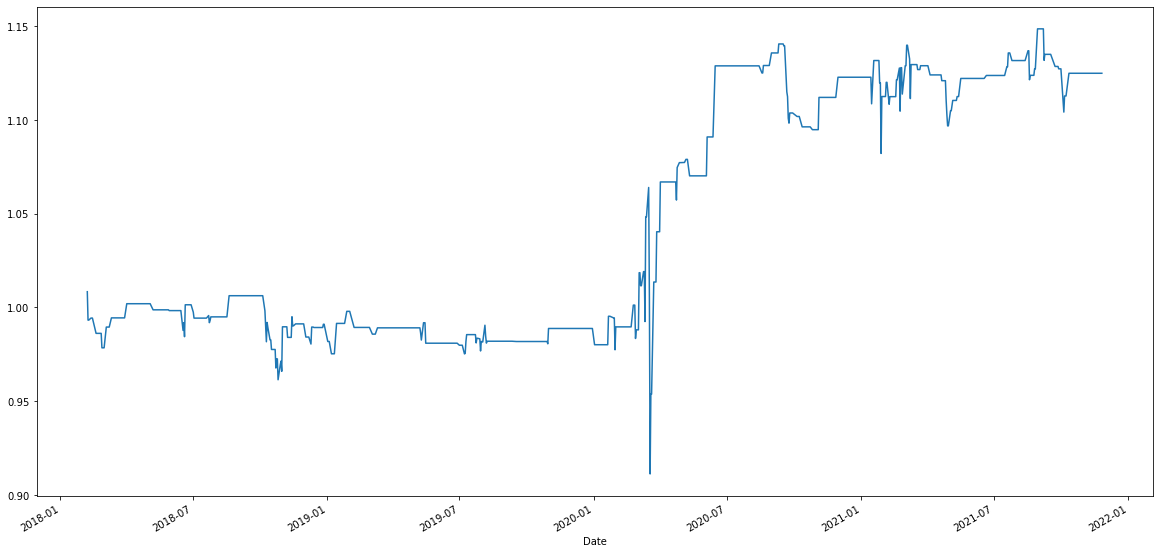

In [31]:
(val_df.log_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

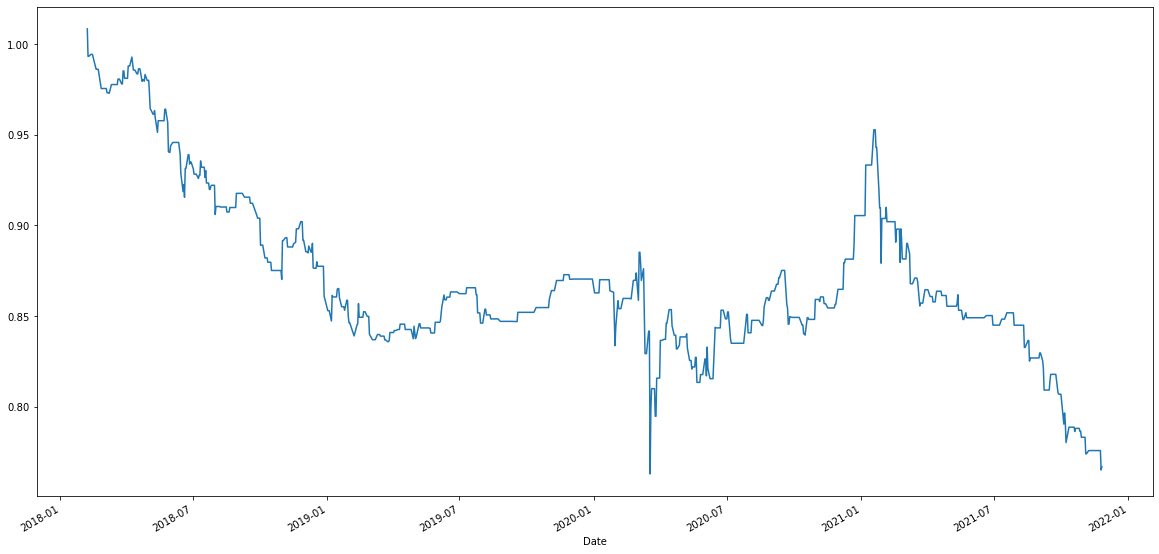

In [32]:
(val_df.rfc_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

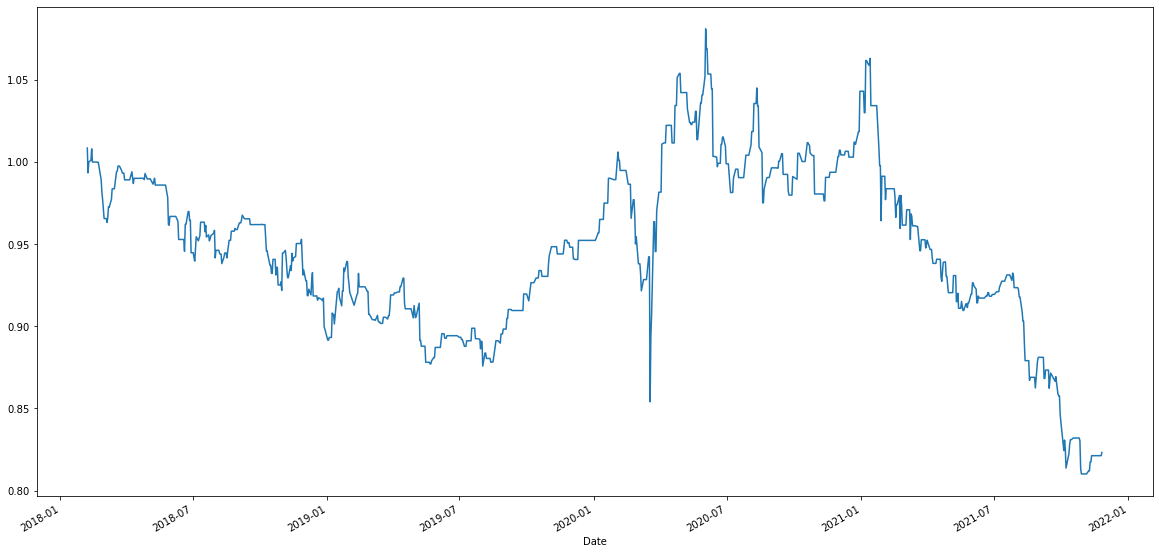

In [33]:
(val_df.tree_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

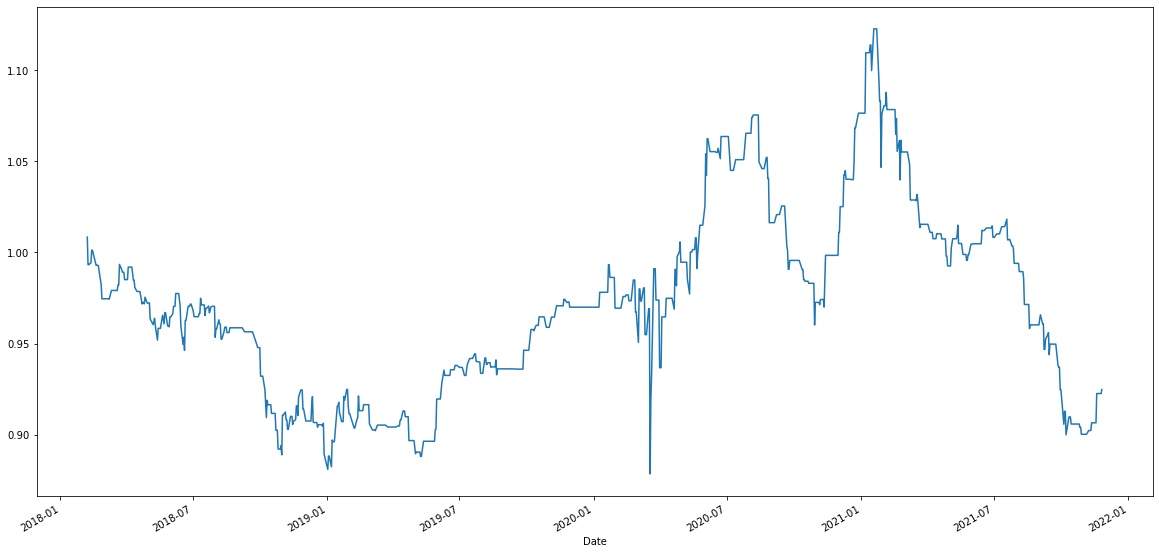

In [34]:
(val_df.lgbm_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

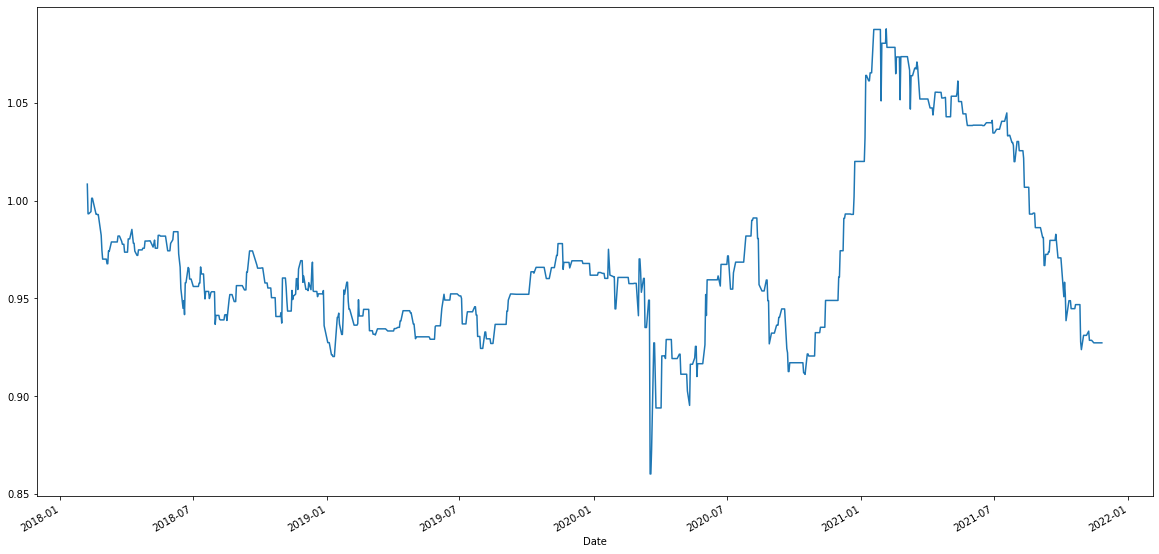

In [35]:
(val_df.XGB_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

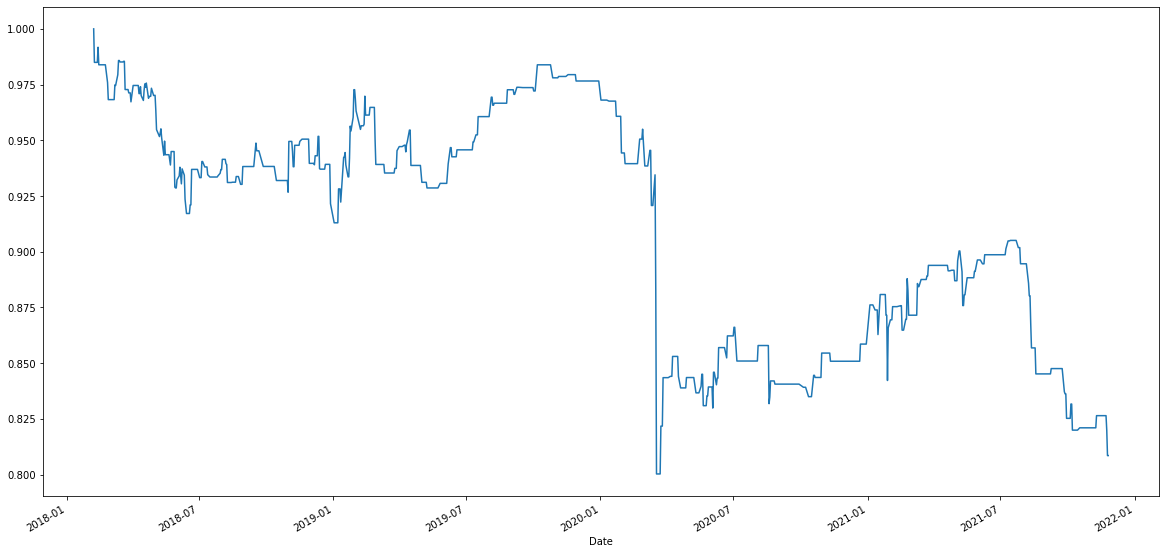

In [36]:
(val_df.grid_xgb_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

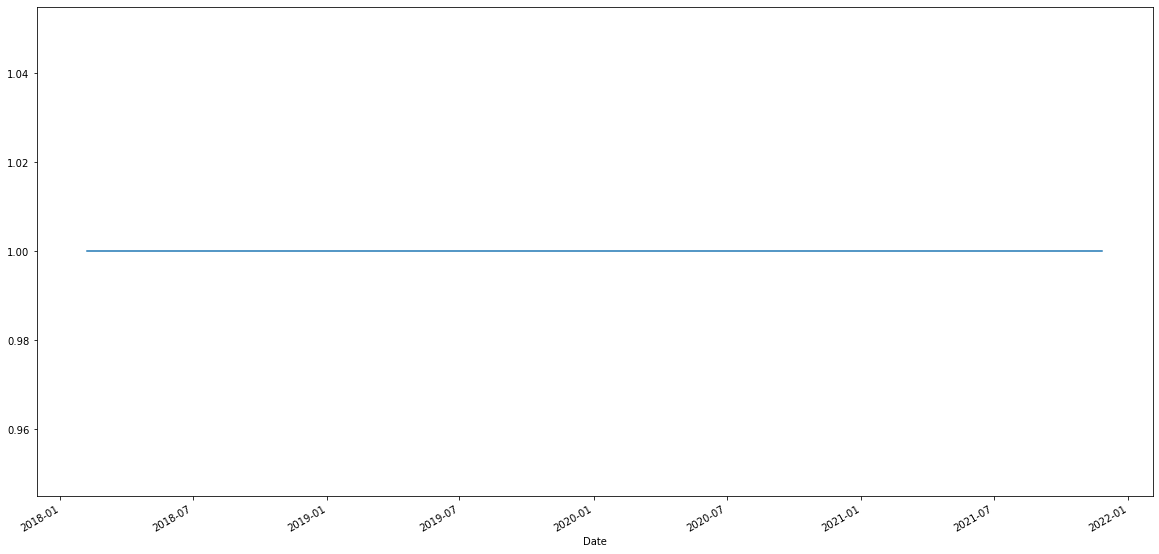

In [37]:
(val_df.grid_lgbm_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

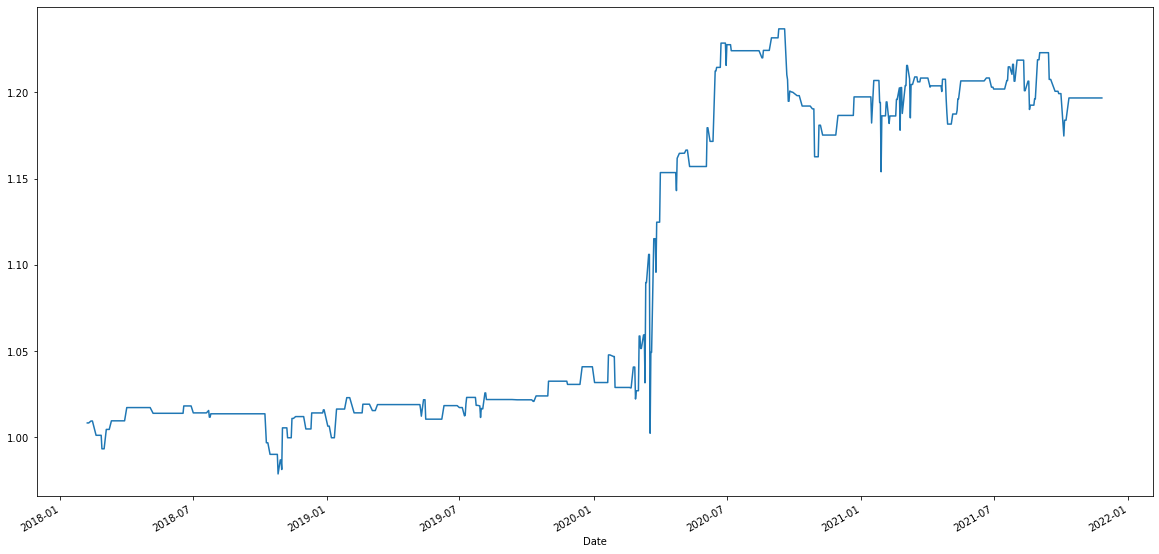

In [38]:
(val_df.grid_lr_cum + 1).cumprod().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

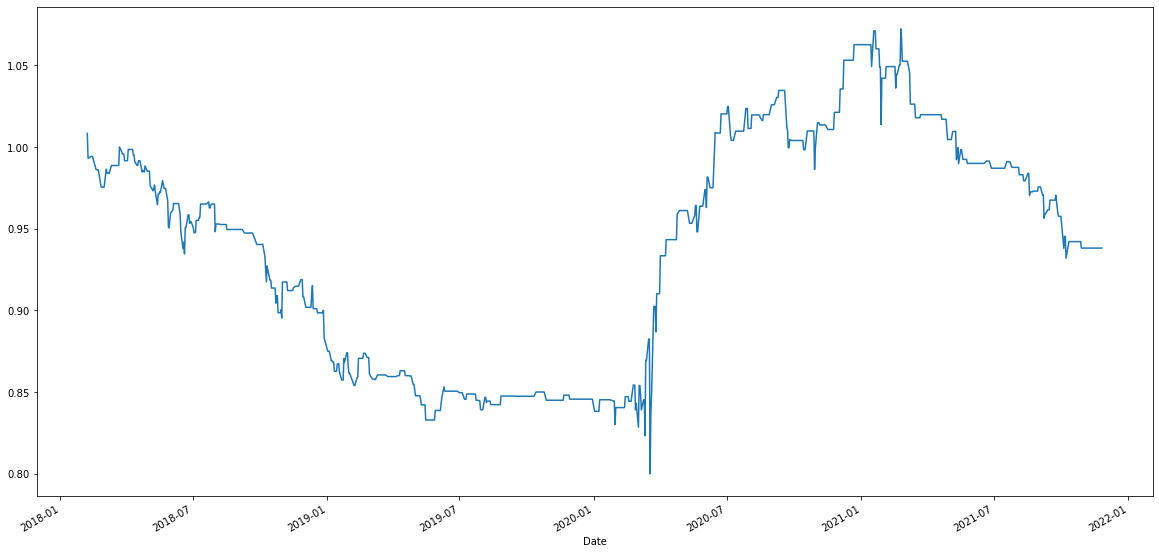

In [39]:
(val_df.grid_rfc_cum + 1).cumprod().plot(figsize=(20,10))

# 샤프지수(Sharpe Ratio)
* 샤프 비율은 투자 자산 또는 매매 전략에서, 일반적으로 위험이라 불리는 편차 한 단위당 초과수익(또는 위험 프리미엄)을 측정한다.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
rtn_df=np.log(val_df[['grid_lr_cum']]+1).fillna(0)
rtn_df

grid_lr_cum
Date                   
2018-02-07     0.008394
2018-02-08     0.000000
2018-02-09     0.000000
2018-02-12     0.001106
2018-02-13     0.000000
...                 ...
2021-11-23     0.000000
2021-11-24     0.000000
2021-11-25     0.000000
2021-11-26     0.000000
2021-11-29     0.000000

[937 rows x 1 columns]

In [42]:
# 연간수익률

rtn_df.mean() * 252

grid_lr_cum    0.048283
dtype: float64

In [43]:
# 연간 변동성

rtn_df.std() * np.sqrt(252) 

grid_lr_cum    0.100482
dtype: float64

In [44]:
np.exp(rtn_df.cumsum())

grid_lr_cum
Date                   
2018-02-07     1.008430
2018-02-08     1.008430
2018-02-09     1.008430
2018-02-12     1.009546
2018-02-13     1.009546
...                 ...
2021-11-23     1.196654
2021-11-24     1.196654
2021-11-25     1.196654
2021-11-26     1.196654
2021-11-29     1.196654

[937 rows x 1 columns]

In [45]:
# 연간 복리수익률

cum_rtn_df = np.exp(rtn_df.cumsum())    # cumsum() : cumulative sum
cum_rtn_df.head()

grid_lr_cum
Date                   
2018-02-07     1.008430
2018-02-08     1.008430
2018-02-09     1.008430
2018-02-12     1.009546
2018-02-13     1.009546

In [46]:
cum_rtn_df.iloc[0]
cum_rtn_df.iloc[-1]

grid_lr_cum    1.196654
Name: 2021-11-29 00:00:00, dtype: float64

## 연간 누적 수익률 : 5%

In [39]:
# n days 누적수익률을 연간 수익률로 환산

def get_CAGR_series(cum_rtn_df, num_day_in_year=250):  
    cagr_series = cum_rtn_df.iloc[-1]**(num_day_in_year/(len(cum_rtn_df))) - 1
    return cagr_series

In [40]:
get_CAGR_series(cum_rtn_df)

grid_lr_cum    0.049066
Name: 2021-11-29 00:00:00, dtype: float64

## sharpe ratio : 0.23
* kodex200(0.24)의 베이스모델보다 샤프지수가 낮음 => 2017년부터 훈련한 결과값의 샤프지수가 더 높았음 => 2017년부터 측정한 데이터로 변경
* sharpe ratio는 높을수록 좋음

In [41]:
def get_sharpe_ratio(log_rtn_df, yearly_rfr = 0.025):
    excess_rtns = log_rtn_df.mean()*252 - yearly_rfr
    return excess_rtns / (log_rtn_df.std() * np.sqrt(252))

In [42]:
get_sharpe_ratio(rtn_df)

grid_lr_cum    0.231715
dtype: float64

# mdd(Maximum Drawdown)
* 특정 기간동안 발생한 최대 낙폭을 의미하는 하방 리스크 지표 입니다. MDD가 클수록 투자 리스크가 크기 때문에 유의해야 합니다.
* MDD = (기간 동안의 최저점 - 기간 동안의 최고점) / 기간 동안의 최고점

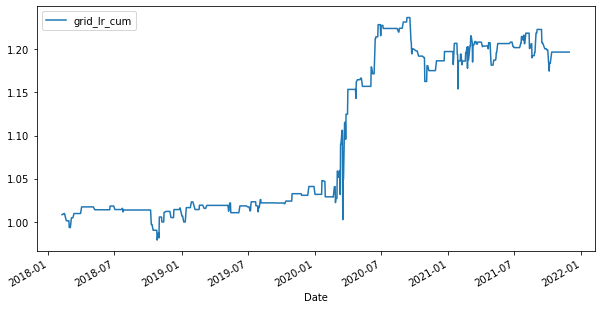

In [43]:
cum_rtn_df.plot(figsize=(10, 5));

<AxesSubplot:xlabel='Date'>

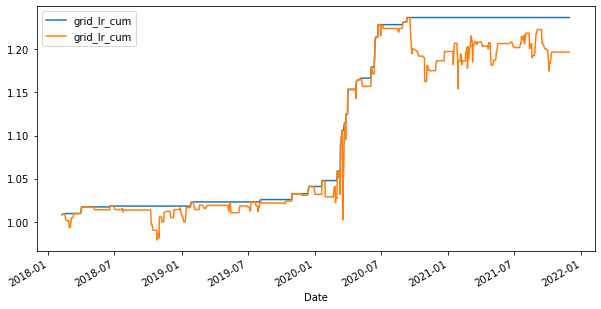

In [44]:
cummax_df = cum_rtn_df.cummax();  # 누적 고점

ax = cummax_df.plot(figsize=(10, 5))
cum_rtn_df.plot(ax=ax)

In [45]:
drawdown_df = cum_rtn_df / cummax_df - 1
drawdown_df[:10]

grid_lr_cum
Date                   
2018-02-07     0.000000
2018-02-08     0.000000
2018-02-09     0.000000
2018-02-12     0.000000
2018-02-13     0.000000
2018-02-14     0.000000
2018-02-19    -0.008201
2018-02-20    -0.008201
2018-02-21    -0.008201
2018-02-22    -0.008201

In [46]:
drawdown_df.plot(figsize=(10, 5));

In [47]:
# 최대 손실비율

mdd_series = drawdown_df.min()
mdd_series

grid_lr_cum   -0.093647
dtype: float64

In [48]:
# 최대 손실기간
drawdown_df

grid_lr_cum
Date                   
2018-02-07     0.000000
2018-02-08     0.000000
2018-02-09     0.000000
2018-02-12     0.000000
2018-02-13     0.000000
...                 ...
2021-11-23    -0.032365
2021-11-24    -0.032365
2021-11-25    -0.032365
2021-11-26    -0.032365
2021-11-29    -0.032365

[937 rows x 1 columns]

In [49]:
# dataframe형식으로 boolean index를 넣으면 True 해당 데이터 => 0, False 해당 데이터=> nan
# draw down이 0이면 0, draw down이 0이 아니면 nan

max_point_df = drawdown_df[drawdown_df == 0]
max_point_df.head()

grid_lr_cum
Date                   
2018-02-07          0.0
2018-02-08          0.0
2018-02-09          0.0
2018-02-12          0.0
2018-02-13          0.0

In [50]:
_df = max_point_df["grid_lr_cum"]
_df.tail()

Date
2021-11-23   NaN
2021-11-24   NaN
2021-11-25   NaN
2021-11-26   NaN
2021-11-29   NaN
Name: grid_lr_cum, dtype: float64

In [51]:
_df.last_valid_index()  # last_valid_index() : nan이 아닌 마지막 데이터의 인덱스

Timestamp('2020-09-18 00:00:00')

In [52]:
_df.loc[drawdown_df["grid_lr_cum"].last_valid_index()] = 0   # 마지막 데이터 (가장 최근데이)의 값을 0으로

In [53]:
# draw down이 0아닌 데이터를 삭제 draw down == 0 : 전고점 대비 하락하지 않은 날짜
# draw down이 0보다 작은 데이터를 모두 삭제하고 draw down이 0인 데이터만 남긴다

_df = _df.dropna()  
_df.tail()

Date
2020-09-15    0.0
2020-09-16    0.0
2020-09-17    0.0
2020-09-18    0.0
2021-11-29    0.0
Name: grid_lr_cum, dtype: float64

In [54]:
# draw down의 기간 길이를 계산
# 얼마 동안 하락하다가 다시 전고점 대비 상승전환하였는지..
# _df.index[1:] : 다음날의 날짜 인덱스
# _df.index[:-1] : 당일의 날짜 인덱스, 길이를 맞추기 위해서 마지막 데이터를 버림

periods = _df.index[1:]-_df.index[:-1]
periods

TimedeltaIndex([  '1 days',   '1 days',   '3 days',   '1 days',   '1 days',
                 '26 days',   '1 days',   '1 days',   '1 days',   '1 days',
                ...
                  '1 days',   '1 days',   '1 days',   '1 days',   '3 days',
                  '1 days',   '1 days',   '1 days',   '1 days', '437 days'],
               dtype='timedelta64[ns]', name='Date', length=166, freq=None)

In [55]:
# draw down이 가장 긴 기간의 순서 인덱스

max_idx = periods.argmax()
max_idx

165

In [56]:
# draw down이 가장 긴 기간

longest_days = periods.max().days
longest_days

437

In [57]:
longest_start_date = _df.index[:-1][max_idx].date()
longest_end_date = _df.index[1:][max_idx].date()

print(longest_start_date, longest_end_date)

2020-09-18 2021-11-29


In [58]:
def get_drawdown_infos(cum_returns_df): 

    cummax_df = cum_returns_df.cummax()   # 누적 전고점
    dd_df = cum_returns_df / cummax_df - 1    # 전고점 대비 하락률 - draw down
 

    mdd_series = dd_df.min()  # max draw down - 전고점 대비 가장 큰 낙폭비율


    dd_duration_info_list = list()
    max_point_df = dd_df[dd_df == 0]  # draw down이 0인 데이터만 0, 나머지는 nan값
    for col in max_point_df:
        _df = max_point_df[col]
        _df.loc[dd_df[col].last_valid_index()] = 0   # 마지막 인덱스 데이터값은 0
        
        #  draw down이 0이 아닌 데이터는 모두 삭제, draw down이 0인 데이터만 남김
        # 전고점보다 가격이 상승하는 데이터만 남김..
        _df = _df.dropna()   
        
        periods = _df.index[1:] - _df.index[:-1]  # 구간별 하락 기간의 날짜수를 계산

        days = periods.days
        max_idx = days.argmax()  # 하락이 가장 긴 기간 데이터의 인덱스

        longest_dd_period = days.max()  # 하락이 가장 긴 기간
        dd_mean = int(np.mean(days))  # 평균 하락 기간
        dd_std = int(np.std(days))    # 하락 기간의 변동성(표준편차)
        

        dd_duration_info_list.append(  # 칼럼별(종목별)로 값을 계산해서 리스트에 담는다
            [
                dd_mean,  # 평균 하락기간
                dd_std,   # 하락기간 표준편차
                longest_dd_period,  # 가장 긴 하락 기간
                
                # 가장 긴 하락기간의 시작일과 종료일
                "{} ~ {}".format(_df.index[:-1][max_idx].date(), _df.index[1:][max_idx].date())
            ]
        )

    dd_duration_info_df = pd.DataFrame(
        dd_duration_info_list,
        index=dd_df.columns,
        columns=['drawdown mean', 'drawdown std', 'longest days', 'longest period']
    )
    return dd_df, mdd_series, dd_duration_info_df

In [59]:
result = get_drawdown_infos(cum_rtn_df)
result[0].plot();

## mdd값 : -0.09
* kodex200의 베이스모델보다 mdd(-0.35) 절대값이 작다. 
* mdd는 절대값이 작을수록 좋음

In [60]:
result[1]

grid_lr_cum   -0.093647
dtype: float64

In [61]:
result[2]

drawdown mean  drawdown std  longest days  \
grid_lr_cum              8            40           437   

                      longest period  
grid_lr_cum  2020-09-18 ~ 2021-11-29